In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
import pandas as pd
import numpy as np

In [36]:
#importing data
Airlines_data = pd.read_csv('Airline_Delay_Cause.csv')
dataframe = pd.DataFrame(Airlines_data)

In [37]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283080 entries, 0 to 283079
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 283080 non-null  int64  
 1   month                283080 non-null  int64  
 2   carrier              283076 non-null  object 
 3   carrier_name         283076 non-null  object 
 4   airport              283076 non-null  object 
 5   airport_name         283079 non-null  object 
 6   arr_flights          282613 non-null  float64
 7   arr_del15            282374 non-null  float64
 8   carrier_ct           282614 non-null  float64
 9   weather_ct           282612 non-null  float64
 10  nas_ct               282618 non-null  float64
 11  security_ct          282618 non-null  float64
 12  late_aircraft_ct     282618 non-null  float64
 13  arr_cancelled        282618 non-null  float64
 14  arr_diverted         282616 non-null  float64
 15  arr_delay        

In [40]:
dataframe.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,283080.000000,283080.000000,282613.000000,282374.000000,282614.000000,282612.000000,282618.000000,282618.000000,282618.000000,282618.000000,282616.000000,282612.000000,282614.000000,282618.000000,282618.000000,282616.000000,282618.000000
mean,2013.491458,6.506652,376.020491,71.683515,21.005896,2.454856,22.928638,0.169832,25.062955,7.185565,0.873447,4204.841521,1306.924232,213.162474,1059.652319,6.922117,1618.124500
std,5.128662,3.473921,1012.406640,195.205081,47.986157,8.977607,78.953743,0.804227,75.972554,37.968824,3.952652,12475.939640,3593.613888,825.888246,4362.627875,38.085819,5003.666585
min,2005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,3.000000,57.000000,8.000000,2.980000,0.000000,1.520000,0.000000,1.620000,0.000000,0.000000,416.000000,142.000000,0.000000,51.000000,0.000000,79.000000
50%,2013.000000,7.000000,117.000000,22.000000,7.940000,0.510000,5.120000,0.000000,5.805000,1.000000,0.000000,1168.500000,429.000000,22.000000,189.000000,0.000000,353.000000
75%,2018.000000,10.000000,267.000000,54.000000,19.350000,2.000000,14.450000,0.000000,16.960000,4.000000,1.000000,3050.000000,1109.000000,152.000000,571.000000,0.000000,1114.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,3962.830000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


In [41]:
#checking for duplicates
dataframe.duplicated().sum()

np.int64(0)

In [42]:
#checking for sum of null values
dataframe.isnull().sum()

,0
year,0
month,0
carrier,4
carrier_name,4
airport,4
airport_name,1
arr_flights,467
arr_del15,706
carrier_ct,466
weather_ct,468


In [43]:
#creating a copy of dataset
Airlines_data_copy = Airlines_data.copy()
df = pd.DataFrame(Airlines_data_copy)

In [44]:
#filling into null val
cat_cols_to_fill = ['carrier', 'carrier_name', 'airport']

for col in cat_cols_to_fill:
  df[col].fillna(df[col].mode()[0], inplace = True)

In [45]:
num_cols_to_fill = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

for cols in num_cols_to_fill:
  df[cols].fillna(df[cols].median(), inplace = True)

In [46]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,1
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [47]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

In [48]:
#Log-transformation because target data was heavily skewed
df['arr_delay_log'] = np.log1p(df['arr_delay'])

In [49]:
#Target encoding for xgb model
X_cat = df[['carrier', 'carrier_name', 'airport', 'airport_name']]
X_num = df[['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
y = df['arr_delay_log']

encoder = TargetEncoder()
X_cat_encoded = encoder.fit_transform(X_cat, y)

print(X_cat_encoded.head())

    carrier  carrier_name   airport  airport_name
0  6.192783      5.923093  5.908086      5.908086
1  6.192783      5.923093  6.615649      6.615649
2  6.192783      5.923093  5.686569      5.686569
3  6.192783      5.923093  6.504016      6.504016
4  6.192783      5.923093  6.256790      6.256790


In [50]:
X = pd.concat([X_cat_encoded, X_num], axis=1)
#Scaling
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

In [51]:
import xgboost as xgb
import lightgbm as lgb

In [53]:
#Initialization
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [54]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [55]:
#fitting to a xgb model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [56]:
#evaluation
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
y_pred = xgb_model.predict(X_test)
print("RMSE:", mse(y_test, y_pred))
print(f"R²: {r2(y_test, y_pred)*100:.2f}%")


RMSE: 0.0014580788551812544
R²: 99.96%


In [57]:
#creating a comparison df
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print(results.head(10))

          Actual  Predicted
275391  4.727388   4.682516
124376  6.878326   6.892893
28591   4.418841   4.405635
189523  7.820038   7.868032
208679  7.519692   7.483589
213191  7.431892   7.463125
198036  8.153350   8.143908
196126  6.421622   6.456100
207296  4.394449   4.388310
187622  7.189168   7.130275


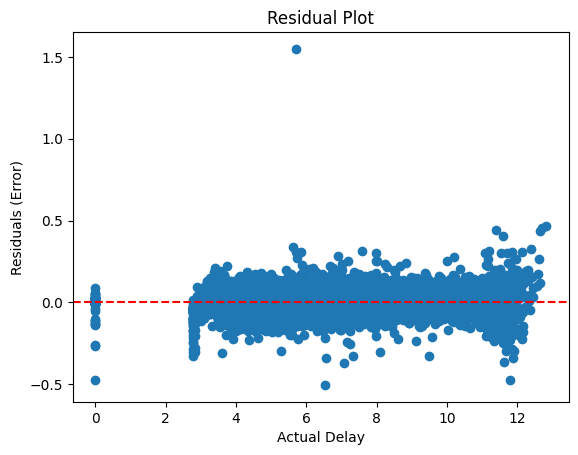

In [58]:
#residual plot where almost residuals are scattered around 0
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Delay")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()
